In [22]:
import numpy as np
import scipy.optimize as opt
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
data = pd.read_csv('Part2_data.csv')
data = pd.DataFrame(data).to_numpy()
data

array([[ 4.99999989e-03,  2.89560594e-02, -9.81234837e+00,
         5.70465066e-02,  4.50657157e-04],
       [ 9.99999978e-03,  1.21038686e-02, -9.80734921e+00,
         2.67876126e-02,  4.50657157e-04],
       [ 1.49999997e-02,  2.06048544e-02, -9.82693100e+00,
         3.96061242e-02,  4.50657157e-04],
       ...,
       [ 3.06299992e+01,  4.35186177e-02, -9.67431927e+00,
         5.75205497e-02,  5.18487161e-03],
       [ 3.06350002e+01,  7.85710104e-03, -9.61473751e+00,
         3.51134986e-02,  1.93967856e-02],
       [ 3.06399994e+01,  6.49389029e-02, -9.52110577e+00,
         7.64240101e-02,  3.83151025e-02]])

In [27]:
def model_lin(x, m, c):
    return m * x + c

def norm_res(predicted, observed, errors):
    res = observed-predicted
    return res / errors 

In [30]:
# Here we shall be calculating non-weighted fits for y-error estimation
y_accel = data[1000:,2]
force = data[1000:,4]
mInit = 0.5
cInit = 0.2

parameters, covariance = opt.curve_fit(model_lin, y_accel, force, p0=[mInit,cInit]) # Simple regression

slope_s = parameters[0] # Simple regression slope

NameError: name 'y_err' is not defined

In [35]:
# Weighted regression. Note we use linear model still, as we have already linearized our data to (T^2, I)
parameters, covariance = opt.curve_fit(model_lin, y_accel, force, p0=[mInit,cInit])

slope = parameters[0] # Weighted regression slope
intcp = parameters[1] # Weighted regression intercept
slope_err = np.sqrt(covariance[0][0]) # Weighted regression slope error
intcp_err = np.sqrt(covariance[1][1]) # Weighted regression intercep error

y_model = model_lin(force, slope, intcp) # Y values predicted with our model

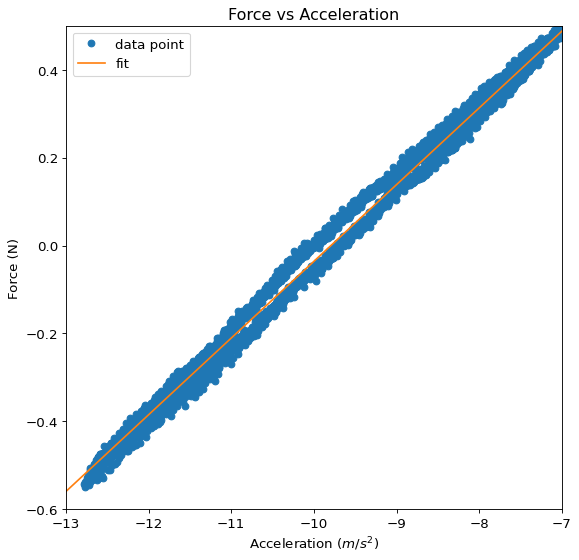

In [53]:
# Force vs Acceleration graph
plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '12'})

plt.errorbar(y_accel, force, fmt='o', capsize = 3, capthick = 1, label="data point")
plt.errorbar(np.linspace(-13,7), model_lin(np.linspace(-13,7), slope, intcp), label='fit')

plt.title("Force vs Acceleration")
plt.xlabel('Acceleration ($m/s^2$)')
plt.ylabel('Force (N)')
plt.xlim(-13, -7)
plt.ylim(-0.6, 0.5)
plt.legend()
plt.show()